In [89]:
import pandas as pd
import numpy as np
import datetime

In [88]:
# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [86]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
data = pd.read_excel("data.xlsx")

In [5]:
data.shape

(5100, 12)

In [6]:
data.head(5)

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
0,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Business Cabin,12,8,340.88,NaN
1,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Economy Cabin,177,113,80.33,NaN
2,BOM,DXB,869,2014-04-03,13:30:00,2014-04-03,15:30:00,Business Cabin,12,6,256.50,NaN
3,BOM,DXB,869,2014-04-03,13:30:00,2014-04-03,15:30:00,Economy Cabin,177,106,82.26,NaN
4,BOM,DXB,870,2014-04-03,19:10:00,2014-04-03,21:10:00,Business Cabin,12,8,400.75,NaN


In [7]:
data.tail(10)

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
5090,DXB,BOM,868,2015-06-30,16:35:00,2015-06-30,22:10:00,Business Cabin,20,12,164.33,NaN
5091,DXB,BOM,868,2015-06-30,16:35:00,2015-06-30,22:10:00,Economy Cabin,171,173,173.92,NaN
5092,DXB,BOM,871,2015-06-30,22:15:00,2015-07-01,04:00:00,Business Cabin,16,13,159.04,NaN
5093,DXB,BOM,871,2015-06-30,22:15:00,2015-07-01,04:00:00,Economy Cabin,177,166,144.76,NaN
5094,DXB,BOM,698,2015-07-01,12:15:00,2015-07-01,17:50:00,Business Cabin,16,12,179.32,NaN
5095,DXB,BOM,698,2015-07-01,12:15:00,2015-07-01,17:50:00,Economy Cabin,177,176,162.69,NaN
5096,DXB,BOM,868,2015-07-01,16:35:00,2015-07-01,22:10:00,Business Cabin,16,15,247.11,NaN
5097,DXB,BOM,868,2015-07-01,16:35:00,2015-07-01,22:10:00,Economy Cabin,177,175,153.54,NaN
5098,DXB,BOM,871,2015-07-01,22:15:00,2015-07-02,04:00:00,Business Cabin,16,8,152.96,NaN
5099,DXB,BOM,871,2015-07-01,22:15:00,2015-07-02,04:00:00,Economy Cabin,177,176,123.60,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Origin                 5100 non-null   object        
 1   Destination            5100 non-null   object        
 2   FlightID               5100 non-null   int64         
 3   DepartureDate          5100 non-null   datetime64[ns]
 4   DepartureTime          5100 non-null   object        
 5   ArrivalDate            5100 non-null   datetime64[ns]
 6   ArrivalTime            5100 non-null   object        
 7   Cabin                  5100 non-null   object        
 8   CabinCapacity          5100 non-null   int64         
 9   CabinBookings          5100 non-null   int64         
 10  AverageFarePerBooking  5100 non-null   float64       
 11  Forecasted Bookings    0 non-null      float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory u

In [9]:
data["DepartureDate"].min()

Timestamp('2014-04-03 00:00:00')

In [10]:
data["DepartureDate"].max()

Timestamp('2015-07-01 00:00:00')

In [11]:
data["Origin"].unique()

array(['BOM', 'DXB'], dtype=object)

In [12]:
data["Destination"].unique()

array(['DXB', 'BOM'], dtype=object)

In [13]:
data["FlightID"].unique()

array([697, 869, 870, 698, 868, 871], dtype=int64)

In [14]:
data["FlightID"].value_counts()

871    908
870    908
869    908
868    908
698    734
697    734
Name: FlightID, dtype: int64

In [15]:
data["FlightID"].unique()

array([697, 869, 870, 698, 868, 871], dtype=int64)

In [16]:
df_697_eco = data[(data["FlightID"] == 697) & (data["Cabin"] == "Economy Cabin")]
df_697_bus = data[(data["FlightID"] == 697) & (data["Cabin"] == "Business Cabin")]

In [17]:
df_697_eco.shape

(367, 12)

In [18]:
df_697_bus.shape

(367, 12)

In [19]:
df_697_eco.head()

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
1,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Economy Cabin,177,113,80.33,NaN
7,BOM,DXB,697,2014-04-04,09:15:00,2014-04-04,11:15:00,Economy Cabin,183,137,86.90,NaN
13,BOM,DXB,697,2014-04-05,09:15:00,2014-04-05,11:15:00,Economy Cabin,183,105,84.45,NaN
19,BOM,DXB,697,2014-04-06,09:15:00,2014-04-06,11:15:00,Economy Cabin,183,91,76.69,NaN
25,BOM,DXB,697,2014-04-07,09:15:00,2014-04-07,11:15:00,Economy Cabin,177,131,96.71,NaN


In [20]:
df_697_bus.head()

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
0,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Business Cabin,12,8,340.88,NaN
6,BOM,DXB,697,2014-04-04,09:15:00,2014-04-04,11:15:00,Business Cabin,8,7,324.57,NaN
12,BOM,DXB,697,2014-04-05,09:15:00,2014-04-05,11:15:00,Business Cabin,8,4,206.50,NaN
18,BOM,DXB,697,2014-04-06,09:15:00,2014-04-06,11:15:00,Business Cabin,8,0,10.00,NaN
24,BOM,DXB,697,2014-04-07,09:15:00,2014-04-07,11:15:00,Business Cabin,12,4,154.75,NaN


import datetime
split_date = datetime.datetime(2015,4,1)

train_ = df_697_eco[df_697_eco["DepartureDate"] < split_date]
test_ = df_697_eco[df_697_eco["DepartureDate"] >= split_date]

train_.tail(25)

train_["DepartureTime"].unique()

train_["PercentageCabinBooking"] = train_["CabinBookings"]/train_["CabinCapacity"]

train_.head()

sns.scatterplot(x="DepartureDate", y="PercentageCabinBooking", size="CabinBookings", data=train_)

ax = sns.scatterplot(x="DepartureDate", y="CabinBookings", size="CabinBookings", data=train_)
#ax.set_xlim(2014,2016)
#ax.set_xticks(range(2014,2016))
plt.show()

In [21]:
df_698_eco = data[(data["FlightID"] == 698) & (data["Cabin"] == "Economy Cabin")]
df_868_eco = data[(data["FlightID"] == 868) & (data["Cabin"] == "Economy Cabin")]
df_869_eco = data[(data["FlightID"] == 869) & (data["Cabin"] == "Economy Cabin")]
df_870_eco = data[(data["FlightID"] == 870) & (data["Cabin"] == "Economy Cabin")]
df_871_eco = data[(data["FlightID"] == 871) & (data["Cabin"] == "Economy Cabin")]

In [22]:
df_698_bus = data[(data["FlightID"] == 698) & (data["Cabin"] == "Business Cabin")]
df_868_bus = data[(data["FlightID"] == 868) & (data["Cabin"] == "Business Cabin")]
df_869_bus = data[(data["FlightID"] == 869) & (data["Cabin"] == "Business Cabin")]
df_870_bus = data[(data["FlightID"] == 870) & (data["Cabin"] == "Business Cabin")]
df_871_bus = data[(data["FlightID"] == 871) & (data["Cabin"] == "Business Cabin")]

In [23]:
df_697_eco = df_697_eco.sort_values('DepartureDate')
df_697_eco = df_697_eco.set_index('DepartureDate')
df_697_eco.index

DatetimeIndex(['2014-04-03', '2014-04-04', '2014-04-05', '2014-04-06',
               '2014-04-07', '2014-04-08', '2014-04-09', '2014-04-10',
               '2014-04-11', '2014-04-12',
               ...
               '2015-06-22', '2015-06-23', '2015-06-24', '2015-06-25',
               '2015-06-26', '2015-06-27', '2015-06-28', '2015-06-29',
               '2015-06-30', '2015-07-01'],
              dtype='datetime64[ns]', name='DepartureDate', length=367, freq=None)

In [24]:
y = df_697_eco['CabinBookings'].resample('MS').mean()

y['2014':]

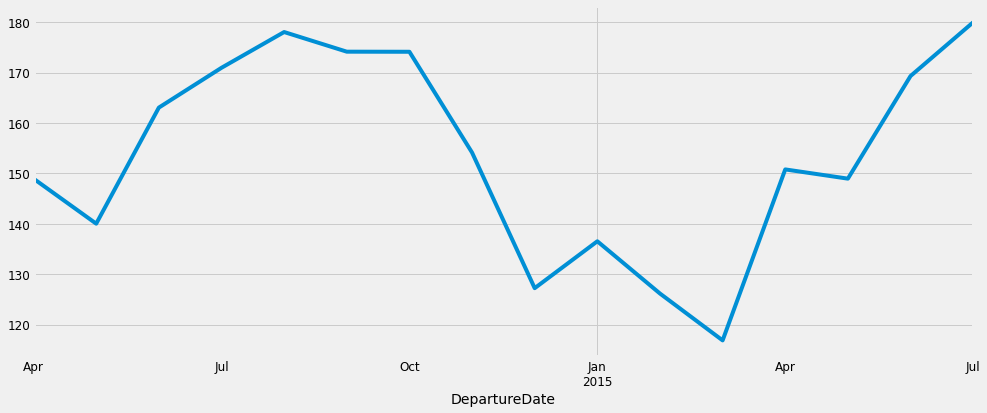

In [25]:
y.plot(figsize=(15, 6))
plt.show()

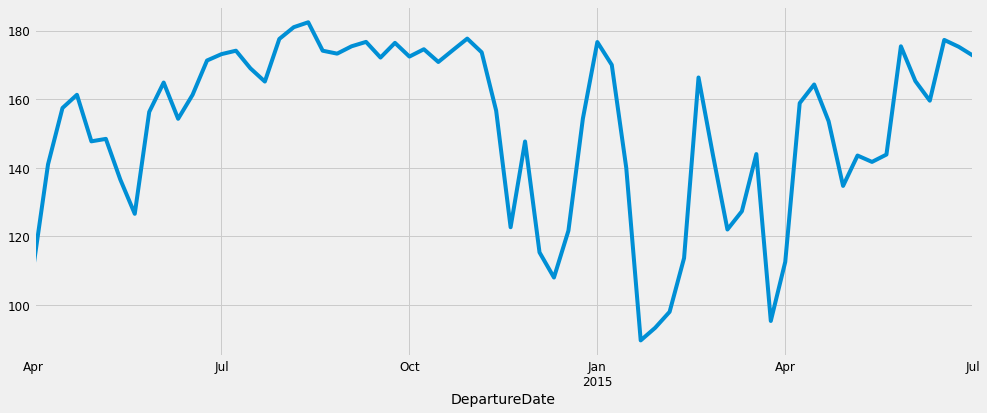

In [26]:
y = df_697_eco['CabinBookings'].resample('W').mean()
y.plot(figsize=(15, 6))
plt.show()

y['2014':]

import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [29]:
df_697_eco = data[(data["FlightID"] == 697) & (data["Cabin"] == "Economy Cabin")]
df_697_bus = data[(data["FlightID"] == 697) & (data["Cabin"] == "Business Cabin")]

In [80]:
split_date = datetime.datetime(2015,4,1)
train = df_697_eco[df_697_eco["DepartureDate"] < split_date]
test = df_697_eco[df_697_eco["DepartureDate"] >= split_date]

# Moving Average

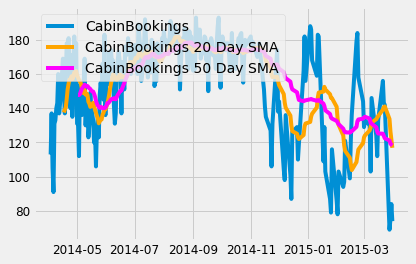

In [32]:
rolling_mean = train.CabinBookings.rolling(window=15).mean()
rolling_mean2 = train.CabinBookings.rolling(window=30).mean()
plt.plot(train.DepartureDate, train.CabinBookings, label='CabinBookings')
plt.plot(train.DepartureDate, rolling_mean, label='CabinBookings 20 Day SMA', color='orange')
plt.plot(train.DepartureDate, rolling_mean2, label='CabinBookings 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

In [41]:
rolling_mean.tail()

2521    170.0
2527    170.9
2533    171.1
2539    172.5
2545    173.8
Name: CabinBookings, dtype: float64

275
92
0
predicted=116.866667, expected=87.000000
1
predicted=114.066667, expected=84.000000
2
predicted=110.800000, expected=134.000000
3
predicted=111.066667, expected=160.000000
4
predicted=114.866667, expected=165.000000
5
predicted=116.133333, expected=182.000000
6
predicted=120.000000, expected=178.000000
7
predicted=124.400000, expected=155.000000
8
predicted=125.866667, expected=169.000000
9
predicted=126.733333, expected=115.000000
10
predicted=124.866667, expected=152.000000
11
predicted=125.533333, expected=161.000000
12
predicted=131.666667, expected=152.000000
13
predicted=136.800000, expected=152.000000
14
predicted=141.333333, expected=147.000000
15
predicted=146.200000, expected=185.000000
16
predicted=152.733333, expected=185.000000
17
predicted=159.466667, expected=146.000000
18
predicted=160.266667, expected=183.000000
19
predicted=161.800000, expected=165.000000
20
predicted=161.800000, expected=155.000000
21
predicted=160.000000, expected=125.000000
22
predicted=15

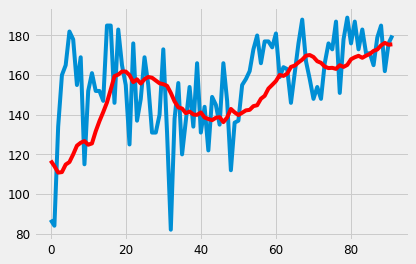

In [92]:
window = 15
history = train.CabinBookings.tolist()
test_ = test.CabinBookings.tolist()

print(len(history))
print(len(test))
predictions = list()
# walk forward over time steps in test
for t in range(len(test_)):
    print(t)
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test_[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_absolute_error(test_, predictions)
print('Test MAE: %.3f' % error)
# plot
plt.plot(test_)
plt.plot(predictions, color='red')
plt.show()


# Machine Learning methods

In [59]:
#from sklearn import preprocessing
def create_features(df, label=None):
    """
    Creates features from datetime index.
    """
    df = df.copy()
    #df['date'] = df.index
    df['depmonth'] = df['DepartureDate'].dt.month
    df['depday'] = df['DepartureDate'].dt.day
    df['depdayofweek'] = df['DepartureDate'].dt.dayofweek
    df['depquarter'] = df['DepartureDate'].dt.quarter
    df['depweekofyear'] = df['DepartureDate'].dt.weekofyear
    
    df['arrmonth'] = df['ArrivalDate'].dt.month
    df['arrday'] = df['ArrivalDate'].dt.day
    df['arrdayofweek'] = df['ArrivalDate'].dt.dayofweek
    df['arrquarter'] = df['ArrivalDate'].dt.quarter
    df['arrweekofyear'] = df['ArrivalDate'].dt.weekofyear
    #df['arryear'] = df['ArrivalDate'].dt.year
    #df['arrdayofyear'] = df['ArrivalDate'].dt.dayofyear
    
    
    df['dephour'] = pd.to_datetime(df['DepartureTime'], format='%H:%M:%f').dt.hour
    df['arrhour'] = pd.to_datetime(df['ArrivalTime'], format='%H:%M:%f').dt.hour
    
    """
    le = preprocessing.LabelEncoder()
    le.fit(df['Cabin'])
    print(le.classes_)
    df['Cabin'] = le.transform(df['Cabin'])
    """
    #df['Cabin_new'] = df['Cabin'].apply(lambda x: 1 if x=="Business Cabin" else 0)
    
    X = df[['DepartureDate', 'depmonth','depday','depdayofweek','depquarter','depweekofyear',
           'ArrivalDate', 'arrmonth','arrday','arrdayofweek', 'arrquarter','arrweekofyear',
           'dephour', 'arrhour', 'CabinCapacity', 'CabinBookings']]
    if label:
        y = df[label]
        return X, y
    return X

In [60]:
df_new = create_features(df_697_eco)

In [35]:
df_new.head()

,DepartureDate,depmonth,depday,depdayofweek,depquarter,depweekofyear,ArrivalDate,arrmonth,arrday,arrdayofweek,arrquarter,arrweekofyear,dephour,arrhour,CabinBookings
1,2014-04-03,4,3,3,2,14,2014-04-03,4,3,3,2,14,9,11,113
7,2014-04-04,4,4,4,2,14,2014-04-04,4,4,4,2,14,9,11,137
13,2014-04-05,4,5,5,2,14,2014-04-05,4,5,5,2,14,9,11,105
19,2014-04-06,4,6,6,2,14,2014-04-06,4,6,6,2,14,9,11,91
25,2014-04-07,4,7,0,2,15,2014-04-07,4,7,0,2,15,9,11,131


In [25]:
split_date = datetime.datetime(2015,4,1)

In [26]:
train = df_new[df_new["DepartureDate"] < split_date]
test = df_new[df_new["DepartureDate"] >= split_date]

In [27]:
df_new.shape

(367, 15)

In [28]:
train.shape

(275, 15)

In [29]:
test.shape

(92, 15)

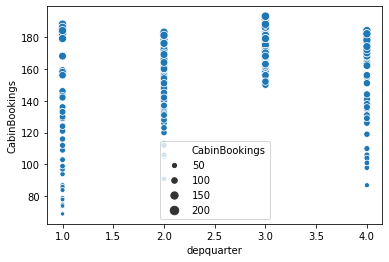

In [31]:
sns.scatterplot(x="depquarter", y="CabinBookings", size="CabinBookings", data=train)

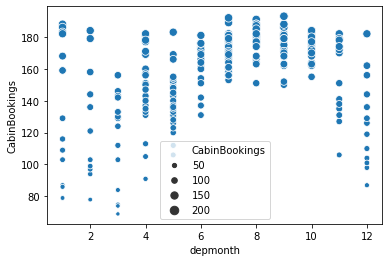

In [32]:
sns.scatterplot(x="depmonth", y="CabinBookings", size="CabinBookings", data=train)

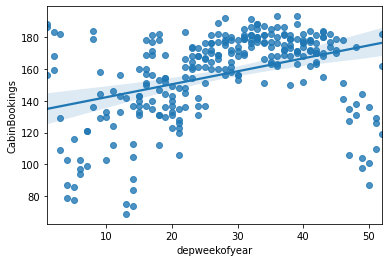

In [33]:
sns.regplot(x="depweekofyear", y="CabinBookings",data=train)

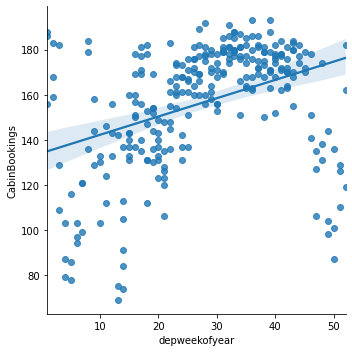

In [34]:
sns.lmplot(x="depweekofyear", y="CabinBookings",data=train)

In [35]:
train.head()

,DepartureDate,depmonth,depday,depdayofweek,depquarter,depweekofyear,ArrivalDate,arrmonth,arrday,arrdayofweek,arrquarter,arrweekofyear,dephour,arrhour,CabinBookings
1,2014-04-03,4,3,3,2,14,2014-04-03,4,3,3,2,14,9,11,113
7,2014-04-04,4,4,4,2,14,2014-04-04,4,4,4,2,14,9,11,137
13,2014-04-05,4,5,5,2,14,2014-04-05,4,5,5,2,14,9,11,105
19,2014-04-06,4,6,6,2,14,2014-04-06,4,6,6,2,14,9,11,91
25,2014-04-07,4,7,0,2,15,2014-04-07,4,7,0,2,15,9,11,131


In [36]:
train.corr()

,depmonth,depday,depdayofweek,depquarter,depweekofyear,arrmonth,arrday,arrdayofweek,arrquarter,arrweekofyear,dephour,arrhour,CabinBookings
depmonth,1.000000,-0.029656,-0.021544,0.959717,0.967160,1.000000,-0.029656,-0.021544,0.959717,0.967160,NaN,NaN,0.384161
depday,-0.029656,1.000000,0.010168,-0.033962,0.045649,-0.029656,1.000000,0.010168,-0.033962,0.045649,NaN,NaN,-0.024955
depdayofweek,-0.021544,0.010168,1.000000,-0.021035,-0.022788,-0.021544,0.010168,1.000000,-0.021035,-0.022788,NaN,NaN,-0.052608
depquarter,0.959717,-0.033962,-0.021035,1.000000,0.931395,0.959717,-0.033962,-0.021035,1.000000,0.931395,NaN,NaN,0.420157
depweekofyear,0.967160,0.045649,-0.022788,0.931395,1.000000,0.967160,0.045649,-0.022788,0.931395,1.000000,NaN,NaN,0.380873
arrmonth,1.000000,-0.029656,-0.021544,0.959717,0.967160,1.000000,-0.029656,-0.021544,0.959717,0.967160,NaN,NaN,0.384161
arrday,-0.029656,1.000000,0.010168,-0.033962,0.045649,-0.029656,1.000000,0.010168,-0.033962,0.045649,NaN,NaN,-0.024955
arrdayofweek,-0.021544,0.010168,1.000000,-0.021035,-0.022788,-0.021544,0.010168,1.000000,-0.021035,-0.022788,NaN,NaN,-0.052608
arrquarter,0.959717,-0.033962,-0.021035,1.000000,0.931395,0.959717,-0.033962,-0.021035,1.000000,0.931395,NaN,NaN,0.420157
arrweekofyear,0.967160,0.045649,-0.022788,0.931395,1.000000,0.967160,0.045649,-0.022788,0.931395,1.000000,NaN,NaN,0.380873


In [95]:
def build_models(df):
    
    train = df[df["DepartureDate"] < split_date]
    test = df[df["DepartureDate"] >= split_date]
    
    df_train = create_features(train)
    df_test = create_features(test)
    
    cols_to_drop = ["CabinBookings", "DepartureDate", "ArrivalDate", \
                                  "arrday", "arrdayofweek", "arrmonth", "arrquarter", "arrweekofyear", \
                                 "dephour", "arrhour"]

    y_train = df_train["CabinBookings"]
    X_train = df_train.drop(columns=cols_to_drop, axis=1)

    y_test = df_test["CabinBookings"]
    X_test = df_test.drop(columns=cols_to_drop, axis=1)
    print(X_train.columns)
    
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("mean_absolute_error of Linear Regression: ",mean_absolute_error(y_test, y_pred))

    clf = DecisionTreeRegressor()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("mean_absolute_error of Decision Tree Regressor: ",mean_absolute_error(y_test, y_pred))

    clf = RandomForestRegressor()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("mean_absolute_error of Random Forest Regressor: ",mean_absolute_error(y_test, y_pred))
    
    df_ = pd.DataFrame({"Actual Bookings" : y_test, "Predicted Bookings": y_pred})
    #print(df_)
    
    test["Forecasted Bookings"] = y_pred
    plt.plot(test["CabinBookings"])
    plt.plot(test["Forecasted Bookings"], color='red')
    plt.show()
    return test

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  18.79907709154785
mean_absolute_error of Decision Tree Regressor:  19.793478260869566
mean_absolute_error of Random Forest Regressor:  16.112282608695647


<ipython-input-95-da7d368f016d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


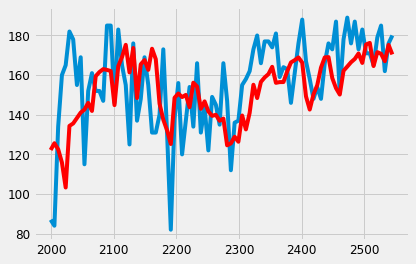

In [96]:
res = build_models(df_697_eco)


Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  2.1282141535970887
mean_absolute_error of Decision Tree Regressor:  2.9565217391304346
mean_absolute_error of Random Forest Regressor:  2.232282608695652


<ipython-input-95-da7d368f016d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


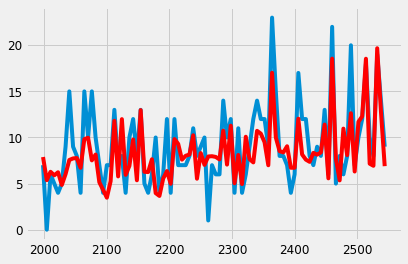

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
1998,BOM,DXB,697,2015-04-01,09:15:00,2015-04-01,11:15:00,Business Cabin,16,7,124.44,7.88
2004,BOM,DXB,697,2015-04-02,09:15:00,2015-04-02,11:15:00,Business Cabin,8,0,26.67,5.37
2010,BOM,DXB,697,2015-04-03,09:15:00,2015-04-03,11:15:00,Business Cabin,12,6,92.34,6.28
2016,BOM,DXB,697,2015-04-04,09:15:00,2015-04-04,11:15:00,Business Cabin,12,5,232.27,5.90
2022,BOM,DXB,697,2015-04-05,09:15:00,2015-04-05,11:15:00,Business Cabin,12,4,26.67,6.23
2028,BOM,DXB,697,2015-04-06,09:15:00,2015-04-06,11:15:00,Business Cabin,12,5,68.80,4.85
2034,BOM,DXB,697,2015-04-07,09:15:00,2015-04-07,11:15:00,Business Cabin,12,9,204.82,6.03
2040,BOM,DXB,697,2015-04-08,09:15:00,2015-04-08,11:15:00,Business Cabin,16,15,193.51,7.56
2046,BOM,DXB,697,2015-04-09,09:15:00,2015-04-09,11:15:00,Business Cabin,12,9,117.48,7.73
2052,BOM,DXB,697,2015-04-10,09:15:00,2015-04-10,11:15:00,Business Cabin,12,8,177.96,7.77


In [97]:
res = build_models(df_697_bus)
res.head(20)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  18.396952406262987
mean_absolute_error of Decision Tree Regressor:  17.902173913043477
mean_absolute_error of Random Forest Regressor:  17.46423913043478


<ipython-input-95-da7d368f016d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


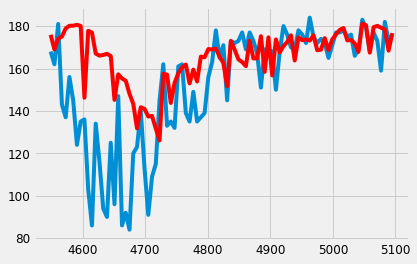

In [99]:
res = build_models(df_698_eco)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  3.5521494334476875
mean_absolute_error of Decision Tree Regressor:  3.9239130434782608
mean_absolute_error of Random Forest Regressor:  3.67554347826087


<ipython-input-95-da7d368f016d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


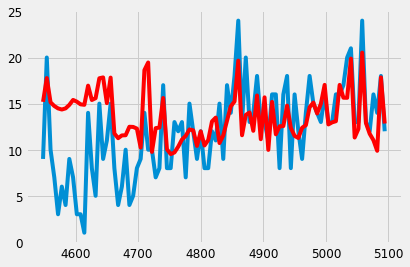

In [100]:
res = build_models(df_698_bus)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  19.647237544879168
mean_absolute_error of Decision Tree Regressor:  15.826086956521738
mean_absolute_error of Random Forest Regressor:  13.84586956521739


<ipython-input-95-da7d368f016d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


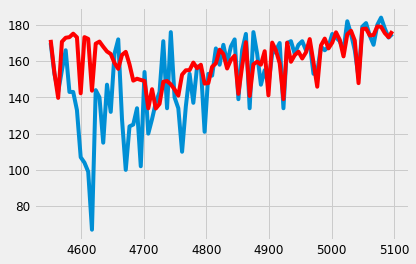

In [101]:
res= build_models(df_868_eco)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  2.9716228825965283
mean_absolute_error of Decision Tree Regressor:  3.891304347826087
mean_absolute_error of Random Forest Regressor:  3.140434782608696


<ipython-input-95-da7d368f016d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


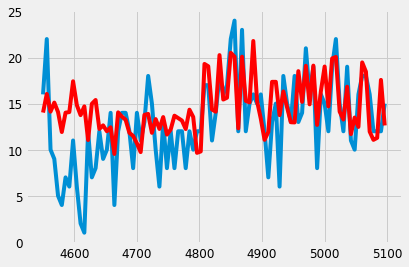

In [102]:
res = build_models(df_868_bus)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  26.75154346964368
mean_absolute_error of Decision Tree Regressor:  19.945652173913043
mean_absolute_error of Random Forest Regressor:  19.391195652173916


<ipython-input-95-da7d368f016d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


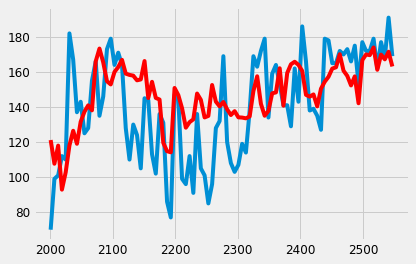

In [103]:
res = build_models(df_869_eco)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  2.1032742095831325
mean_absolute_error of Decision Tree Regressor:  3.1847826086956523
mean_absolute_error of Random Forest Regressor:  2.223913043478261


<ipython-input-95-da7d368f016d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


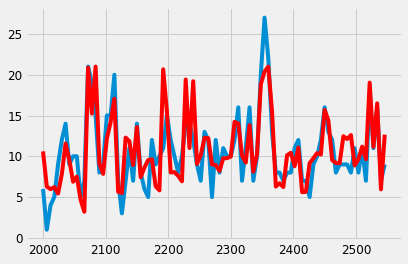

In [104]:
res = build_models(df_869_bus)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  30.973817219016095
mean_absolute_error of Decision Tree Regressor:  23.902173913043477
mean_absolute_error of Random Forest Regressor:  23.885760869565214


<ipython-input-95-da7d368f016d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


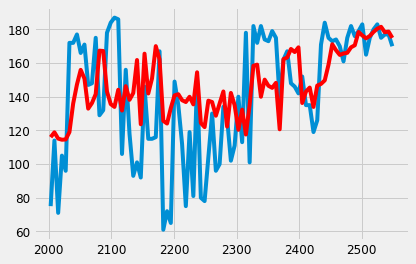

In [105]:
res = build_models(df_870_eco)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  2.170091373546962
mean_absolute_error of Decision Tree Regressor:  3.010869565217391
mean_absolute_error of Random Forest Regressor:  2.055869565217391


<ipython-input-95-da7d368f016d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


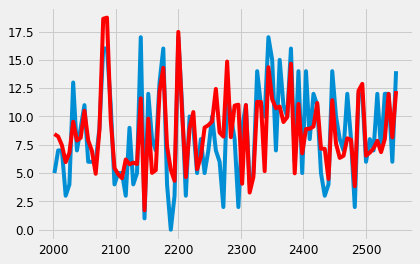

In [106]:
res = build_models(df_870_bus)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  23.957684493527747
mean_absolute_error of Decision Tree Regressor:  22.293478260869566
mean_absolute_error of Random Forest Regressor:  20.722173913043477


<ipython-input-95-da7d368f016d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


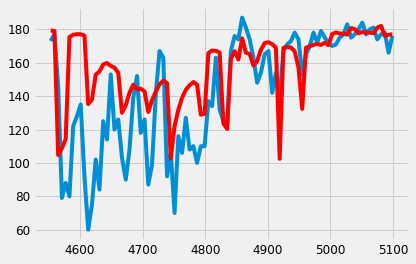

In [107]:
res = build_models(df_871_eco)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  2.759606849415807
mean_absolute_error of Decision Tree Regressor:  3.3152173913043477
mean_absolute_error of Random Forest Regressor:  2.6781521739130434


<ipython-input-95-da7d368f016d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


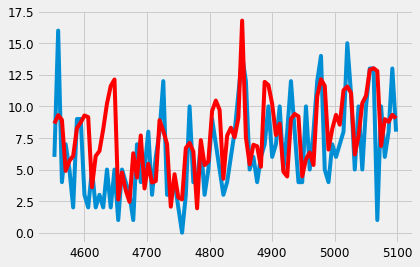

In [108]:
res = build_models(df_871_bus)